# Part 1: Data preprocessing

dataset: https://www.kaggle.com/akram24/restaurant-reviews

## Importing the libraries and dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# quoting=3: we have many double quotes within the text, we have to ignore these double quotes
# it can lead to an execution error

## Data Exploration

In [47]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [48]:
dataset.shape

(1000, 2)

In [49]:
# check the columns
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [50]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [51]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Review'], dtype='object')

In [52]:
# columns with numerical values
dataset.select_dtypes(include=['int64']).columns

Index(['Liked'], dtype='object')

In [53]:
# statistical summary
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [54]:
dataset['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

## Dealing with missing values

In [55]:
# check if there are any null values
dataset.isnull().values.any()

False

In [56]:
# check how many null values
dataset.isnull().values.sum()

0

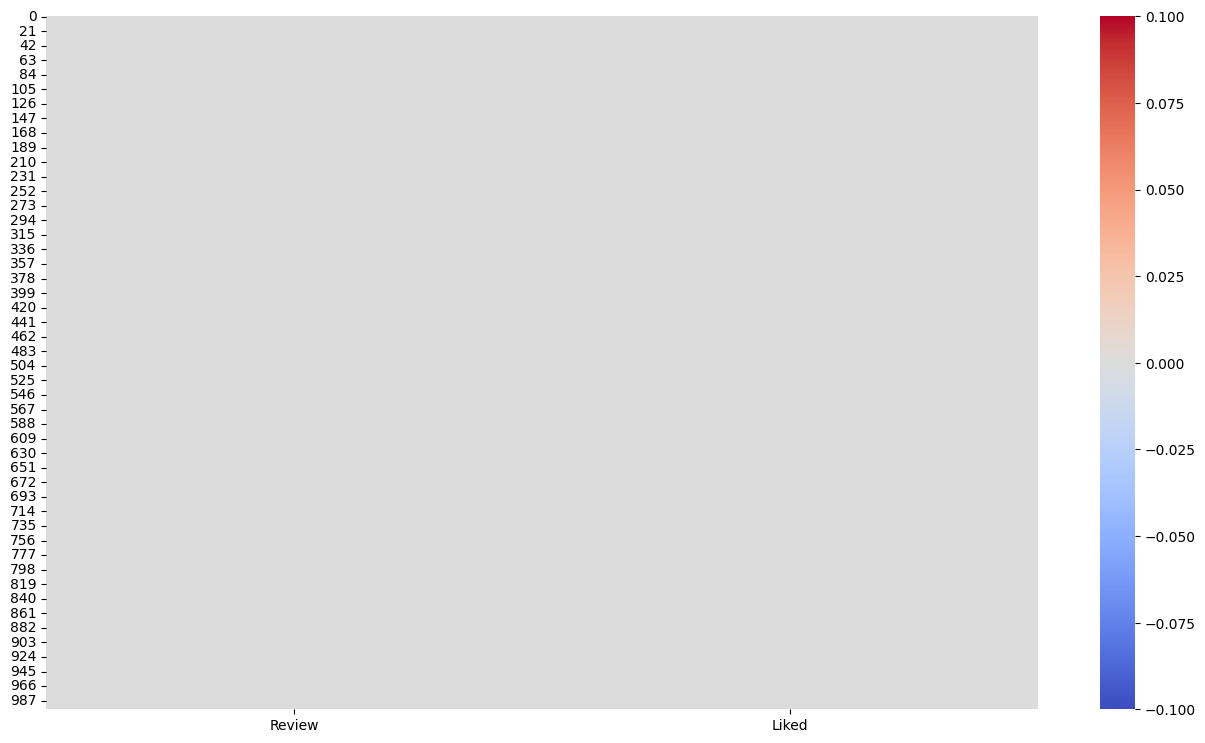

In [57]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data=dataset.isnull(), cmap='coolwarm')
plt.show()

## Dealing with categorical data

In [58]:
# categorical columns
dataset.select_dtypes(include=['object']).columns

Index(['Review'], dtype='object')

In [59]:
# no categorical data

## Countplot

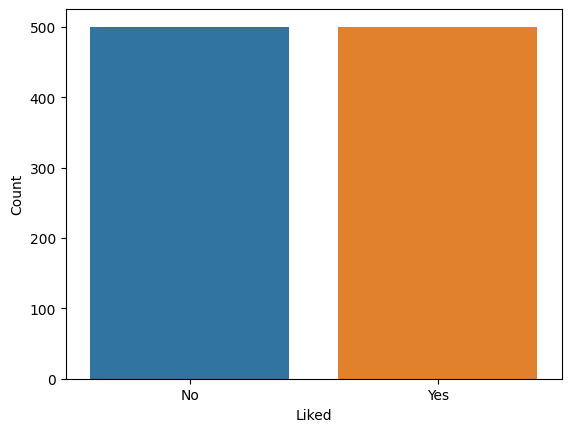

In [60]:
sns.countplot(data=dataset, x='Liked', label='Count')

# Set labels for the x-axis
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plot
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

In [61]:
# Positive reviews
(dataset.Liked == 1).sum()

500

In [62]:
# Negative reviews
(dataset.Liked == 0).sum()

500

## Check length of the messages

In [63]:
dataset['length'] = dataset['Review'].apply(len)
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

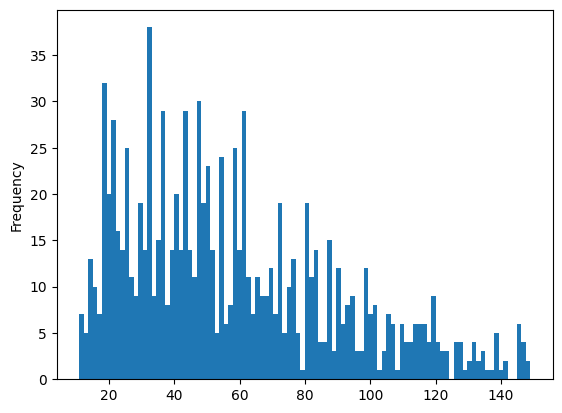

In [64]:
# plot histogram
dataset['length'].plot(bins=100, kind='hist')

In [65]:
dataset.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [66]:
# check the longest message
dataset[dataset['length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [67]:
# check the shortest message
dataset[dataset['length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

In [68]:
positive = dataset[dataset['Liked']==1]

In [69]:
negative = dataset[dataset['Liked']==0]

In [70]:
positive

,Review,Liked,length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [71]:
negative

,Review,Liked,length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [72]:
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [73]:
dataset = dataset.drop(columns='length')

In [74]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Part 2: Cleaning the texts and creating bag of words model

## Cleaning the texts

In [75]:
# import the libraries
import re                                    # regular expressions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords            # import the downloaded stopwords
from nltk.stem.porter import PorterStemmer   # we will use PorterStemmer class to apply the stemming on reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:

corpus = []
ps = PorterStemmer()
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")

for i in range(1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset["Review"][i])  # Corrected the regular expression pattern
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = " ".join(review)
    corpus.append(review)

In [77]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [78]:
len(corpus)

1000

## Creating the Bag of Words model

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
cv = CountVectorizer(max_features =1500)

In [81]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [82]:
x.shape

(1000, 1500)

In [83]:
y.shape

(1000,)

## Splitting the dataset

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

# Part 3: Training the model

## 1) Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [87]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.73,0.684211,0.883495,0.771186


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 42]
 [12 91]]


## 2) XGBoost classifier

In [89]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [90]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

<ipython-input-90-c9112d8e4e6e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.73,0.684211,0.883495,0.771186
1,XGBoost,0.72,0.797468,0.611650,0.692308


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81 16]
 [40 63]]


# Part 4: Predicting if a single review is positive or negative

## Positive review

**review:**
"I love this restaurant so much"

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [101]:

new_review = "I like this restaurant so much"
new_review = re.sub("[^a-zA-z]"," ",new_review)
new_review = new_review.lower().split()
ps = PorterStemmer()
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = " ".join(new_review)
new_corpus =[new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier_nb.predict(new_x_test)
print(new_y_pred)

[1]


## Negative review

In [93]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier_nb.predict(new_x_test)
print(new_y_pred)

[0]
